# Model Training

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [3]:
import sys
import os

from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras import models
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model
from tqdm import trange
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2
from keras.preprocessing import image
from os import listdir
from tensorflow.keras.optimizers import SGD
from os.path import isfile, join
from tensorflow.keras import layers

## Inputs
** Please determine the following **
1. test set
2. trained model
3. threshold for the trained model

In [19]:
# Access VCNN4PuDe Folder
%cd '/content/drive/My Drive/VCNN4PuDe/'
test_set_path="test-sets/test set 1/"  # test set 2 is available in test-sets folder
model_path="models/EfficientNetV1B0.h5" # more trained models are available in models folder
threshold=0.038

/content/drive/My Drive/VCNN4PuDe


# Confusion Matrix

Found 1740 images belonging to 2 classes.
55/55 [==============================] - 5s 58ms/step
**********************Classification Report ******************
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      1289
         1.0       0.65      0.86      0.74       451

    accuracy                           0.84      1740
   macro avg       0.80      0.85      0.81      1740
weighted avg       0.87      0.84      0.85      1740


**************************Confusion Matrix********************


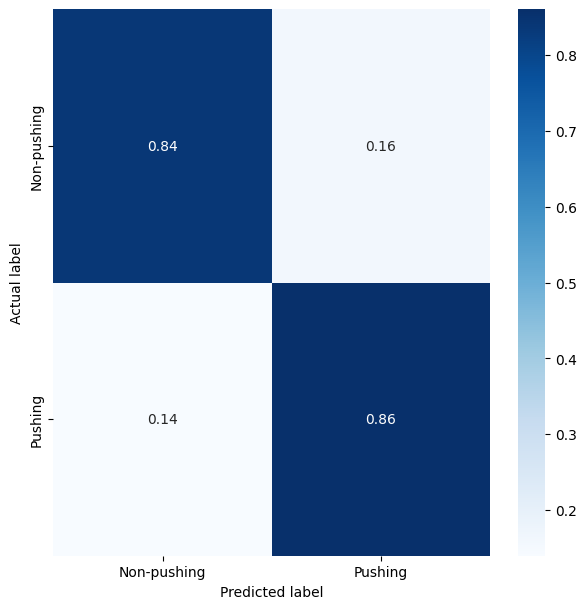

[[1082  207]
 [  64  387]]


<Figure size 600x600 with 0 Axes>

In [20]:
model= load_model(model_path)
model.load_weights(model_path)
test_datagen = ImageDataGenerator()
img_rows, img_cols=224,224
test_generator = test_datagen.flow_from_directory(
        test_set_path,
        target_size=(img_rows, img_cols),

        class_mode='binary')

# Fetching x_test, y_test variables from test.
test_generator.reset()
x_test, y_test = next(test_generator)
for i in range(len(test_generator)-1):
    img, label = next(test_generator)
    x_test = np.append(x_test, img, axis=0 )
    y_test = np.append(y_test, label, axis=0)

nb_test_samples = len(x_test)
test_generator.reset()

classes=["Non-pushing","Pushing"]
y_pred=model.predict(x_test)
Y_pred=np.where(y_pred> threshold  ,1,0)
print("**********************Classification Report ******************")
print(classification_report(y_test, Y_pred))
print()

print ("**************************Confusion Matrix********************")
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=Y_pred).numpy()

con_mat_norm_per = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)


con_mat_df_per = pd.DataFrame(con_mat_norm_per,
                         index = classes,
                         columns = classes)



figure = plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df_per, annot=True,cmap=plt.cm.Blues)

plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

figure = plt.figure(figsize=(6, 6))#

print(con_mat)
